## Feature Selection

### Table of Contents
- Import package
- Load dataset
- Data Analysis
    - Descriptive Analysis
    - Exploratory Data Analysis
    - Diagnostic Analysis
- Interpretation
- References

### Import Packages

In [10]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [12]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

### Load Dataset

In [2]:
df = pd.read_csv("../dataset/merged_dataset.csv")
df

,Country,Year,Co2,Co2_per_capita,Gdp,Gdp_per_capita,Coal_co2,Cement_co2,Flaring_co2,Gas_co2,...,Cumulative_coal_co2,Cumulative_cement_co2,Cumulative_flaring_co2,Cumulative_gas_co2,Cumulative_oil_co2,Annual_co2_fossil_cement,Co2_per_gdp,Consumption_co2_per_gdp,Consumption_co2,Consumption_co2_per_capita
0,India,1960,120581.961,0.267634,3.702988e+10,82.188603,88003183,4002217,NaN,NaN,...,2.544257e+09,40412383,NaN,NaN,2.509192e+08,111450248,0.2140,NaN,NaN,NaN
1,Japan,1960,232781.160,2.497223,4.430734e+10,475.319076,139144064,11139081,NaN,1.601168e+06,...,5.225208e+09,107824883,NaN,8.566389e+06,4.144143e+08,232499641,0.3889,NaN,NaN,NaN
2,Russia,1960,1448637.349,12.082349,NaN,NaN,585156284,13753032,NaN,6.163598e+07,...,9.795065e+09,106299829,NaN,2.953982e+08,3.075058e+09,882927058,1.3281,NaN,NaN,NaN
3,United States,1960,2890696.100,15.999779,5.433000e+11,3007.123445,917963904,28620891,30315936.0,6.300248e+08,...,7.964596e+10,582717047,4.409771e+08,9.410359e+09,2.888055e+10,2897138041,0.8880,NaN,NaN,NaN
4,India,1961,130402.187,0.283704,3.923244e+10,85.354301,95020481,4204885,NaN,3.664000e+03,...,2.639277e+09,44617268,NaN,3.664000e+03,2.722296e+08,120539453,0.2247,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,United States,2019,NaN,NaN,2.143320e+13,65279.529030,1098853710,40895869,84509725.0,1.694894e+09,...,1.747615e+11,2704391255,2.169299e+09,7.489984e+10,1.561177e+11,5255816207,NaN,NaN,5.625784e+09,17.0963
240,India,2020,NaN,NaN,2.660250e+12,1927.707823,1587552167,122908202,1678112.0,1.269841e+08,...,3.525095e+10,2475325116,1.662354e+08,2.348802e+09,1.417518e+10,2441792313,NaN,NaN,NaN,NaN
241,Japan,2020,NaN,NaN,5.057760e+12,40193.252440,402978629,25376205,393235.0,2.165437e+08,...,2.375566e+10,1982515504,1.525941e+07,6.834271e+09,3.274507e+10,1030775384,NaN,NaN,NaN,NaN
242,Russia,2020,NaN,NaN,1.483500e+12,10126.721790,356945515,20306193,46762006.0,7.475909e+08,...,4.513289e+10,1636978541,1.161175e+09,3.415749e+10,3.271505e+10,1577136041,NaN,NaN,NaN,NaN


## Descriptive Analysis

In [3]:
df.describe()

,Year,Co2,Co2_per_capita,Gdp,Gdp_per_capita,Coal_co2,Cement_co2,Flaring_co2,Gas_co2,Oil_co2,...,Cumulative_coal_co2,Cumulative_cement_co2,Cumulative_flaring_co2,Cumulative_gas_co2,Cumulative_oil_co2,Annual_co2_fossil_cement,Co2_per_gdp,Consumption_co2_per_gdp,Consumption_co2,Consumption_co2_per_capita
count,244.000000,2.360000e+02,236.000000,2.160000e+02,216.000000,2.440000e+02,2.440000e+02,2.170000e+02,2.430000e+02,2.440000e+02,...,2.440000e+02,2.440000e+02,2.170000e+02,2.430000e+02,2.440000e+02,2.440000e+02,236.000000,116.000000,1.200000e+02,120.000000
mean,1990.000000,2.171208e+06,10.875571,3.308316e+12,15146.045461,7.553666e+08,3.303388e+07,1.468119e+07,4.562730e+08,8.473632e+08,...,4.436306e+10,1.045526e+09,4.403053e+08,1.390396e+10,3.219084e+10,2.111526e+09,0.568966,0.428041,2.467113e+09,10.351957
std,17.643008,1.720533e+06,7.831794,4.649007e+12,17716.952875,5.953264e+08,2.204596e+07,1.732800e+07,4.644445e+08,7.920679e+08,...,4.944129e+10,6.995926e+08,5.367647e+08,1.923076e+10,3.995524e+10,1.771432e+09,0.351115,0.174206,1.990638e+09,6.887018
min,1960.000000,1.205820e+05,0.267634,3.702988e+10,82.188603,8.800318e+07,4.002217e+06,4.030400e+04,3.664000e+03,1.944485e+07,...,2.544257e+09,4.041238e+07,4.030400e+04,3.664000e+03,2.509192e+08,1.114502e+08,0.214000,0.267500,5.779624e+08,0.661800
25%,1975.000000,9.137266e+05,2.322874,3.838642e+11,1020.881664,3.177325e+08,2.193848e+07,1.260440e+06,4.736453e+07,3.226163e+08,...,1.016174e+10,4.161383e+08,1.318131e+07,3.745138e+08,4.856618e+09,9.123656e+08,0.305875,0.324575,1.249328e+09,4.441600
50%,1990.000000,1.526520e+06,9.729611,1.309045e+12,5851.700295,4.765743e+08,3.224400e+07,6.631840e+06,2.233231e+08,5.571811e+08,...,2.086234e+10,1.021972e+09,1.560678e+08,3.401753e+09,1.796664e+10,1.467037e+09,0.411800,0.360200,1.463176e+09,10.476450
75%,2005.000000,3.545357e+06,18.576282,4.585228e+12,29178.184330,1.111765e+09,3.677308e+07,2.624890e+07,7.852882e+08,9.864219e+08,...,5.376115e+10,1.544094e+09,7.578362e+08,2.278665e+10,3.233663e+10,2.691150e+09,0.800275,0.470725,3.045139e+09,14.784225
max,2020.000000,5.776410e+06,26.899265,2.143320e+13,65279.529030,2.214838e+09,1.436641e+08,8.450972e+07,1.694894e+09,2.608477e+09,...,1.756502e+11,2.745186e+09,2.253809e+09,7.655483e+10,1.581382e+11,6.134521e+09,1.376400,1.167400,6.618792e+09,22.439600


## Exploratory Data Analysis(EDA)

In [4]:
df.shape

(244, 27)

In [5]:
#Check missing values
df.isnull().sum()

Country                         0
Year                            0
Co2                             8
Co2_per_capita                  8
Gdp                            28
Gdp_per_capita                 28
Coal_co2                        0
Cement_co2                      0
Flaring_co2                    27
Gas_co2                         1
Oil_co2                         0
Coal_co2_per_capita             0
Cement_co2_per_capita           0
Flaring_co2_per_capita         27
Gas_co2_per_capita              1
Oil_co2_per_capita              0
Cumulative_co2                  0
Cumulative_coal_co2             0
Cumulative_cement_co2           0
Cumulative_flaring_co2         27
Cumulative_gas_co2              1
Cumulative_oil_co2              0
Annual_co2_fossil_cement        0
Co2_per_gdp                     8
Consumption_co2_per_gdp       128
Consumption_co2               124
Consumption_co2_per_capita    124
dtype: int64

In [14]:
# Drop the non-numeric columns

notnumeric = ['Country']

# creating dummies for gender
# data['Country'] = data['Country'].map({'India':0, 'Japan':1, 'Russia':2, 'United States':3})

# cluster columns
df_numeric_only = df.drop([x for x in notnumeric if x in df.columns], axis=1)
df_numeric_only

,Year,Co2,Co2_per_capita,Gdp,Gdp_per_capita,Coal_co2,Cement_co2,Flaring_co2,Gas_co2,Oil_co2,...,Cumulative_coal_co2,Cumulative_cement_co2,Cumulative_flaring_co2,Cumulative_gas_co2,Cumulative_oil_co2,Annual_co2_fossil_cement,Co2_per_gdp,Consumption_co2_per_gdp,Consumption_co2,Consumption_co2_per_capita
0,1960,120581.961,0.267634,3.702988e+10,82.188603,88003183,4002217,NaN,NaN,19444848,...,2.544257e+09,40412383,NaN,NaN,2.509192e+08,111450248,0.2140,NaN,NaN,NaN
1,1960,232781.160,2.497223,4.430734e+10,475.319076,139144064,11139081,NaN,1.601168e+06,80615328,...,5.225208e+09,107824883,NaN,8.566389e+06,4.144143e+08,232499641,0.3889,NaN,NaN,NaN
2,1960,1448637.349,12.082349,NaN,NaN,585156284,13753032,NaN,6.163598e+07,222381759,...,9.795065e+09,106299829,NaN,2.953982e+08,3.075058e+09,882927058,1.3281,NaN,NaN,NaN
3,1960,2890696.100,15.999779,5.433000e+11,3007.123445,917963904,28620891,30315936.0,6.300248e+08,1281630560,...,7.964596e+10,582717047,4.409771e+08,9.410359e+09,2.888055e+10,2897138041,0.8880,NaN,NaN,NaN
4,1961,130402.187,0.283704,3.923244e+10,85.354301,95020481,4204885,NaN,3.664000e+03,21310423,...,2.639277e+09,44617268,NaN,3.664000e+03,2.722296e+08,120539453,0.2247,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,2019,NaN,NaN,2.143320e+13,65279.529030,1098853710,40895869,84509725.0,1.694894e+09,2313371925,...,1.747615e+11,2704391255,2.169299e+09,7.489984e+10,1.561177e+11,5255816207,NaN,NaN,5.625784e+09,17.0963
240,2020,NaN,NaN,2.660250e+12,1927.707823,1587552167,122908202,1678112.0,1.269841e+08,602669683,...,3.525095e+10,2475325116,1.662354e+08,2.348802e+09,1.417518e+10,2441792313,NaN,NaN,NaN,NaN
241,2020,NaN,NaN,5.057760e+12,40193.252440,402978629,25376205,393235.0,2.165437e+08,377381559,...,2.375566e+10,1982515504,1.525941e+07,6.834271e+09,3.274507e+10,1030775384,NaN,NaN,NaN,NaN
242,2020,NaN,NaN,1.483500e+12,10126.721790,356945515,20306193,46762006.0,7.475909e+08,388774194,...,4.513289e+10,1636978541,1.161175e+09,3.415749e+10,3.271505e+10,1577136041,NaN,NaN,NaN,NaN


In [15]:
#Let us first find out the columns which have atleast 50% of non-null row
df_numeric_only.columns[df_numeric_only.notnull().mean() >= 0.5]

df_numeric_only_not_null = df_numeric_only.drop(df_numeric_only.columns[df_numeric_only.notnull().mean() < 0.5], axis=1)

# Removing the null values from the dataset by using the 'dropna()' function
df_numeric_only_not_null.dropna(inplace=True)
df_numeric_only_not_null.shape

(192, 23)

## Feature Selection

In [16]:
X = df_numeric_only_not_null.drop("Co2", 1)   #Feature Matrix, the independent variables set
y = df_numeric_only_not_null["Co2"]          #Target Variable, dependent variable

In [17]:
def backward_elimination(data, target,significance_level = 0.05):
    features = data.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(data[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break 
    return features

backward_elimination(X, y)

['Year',
 'Co2_per_capita',
 'Gdp',
 'Gdp_per_capita',
 'Coal_co2',
 'Cement_co2',
 'Flaring_co2',
 'Oil_co2',
 'Coal_co2_per_capita',
 'Gas_co2_per_capita',
 'Oil_co2_per_capita',
 'Cumulative_coal_co2',
 'Annual_co2_fossil_cement']

## Filtering Method

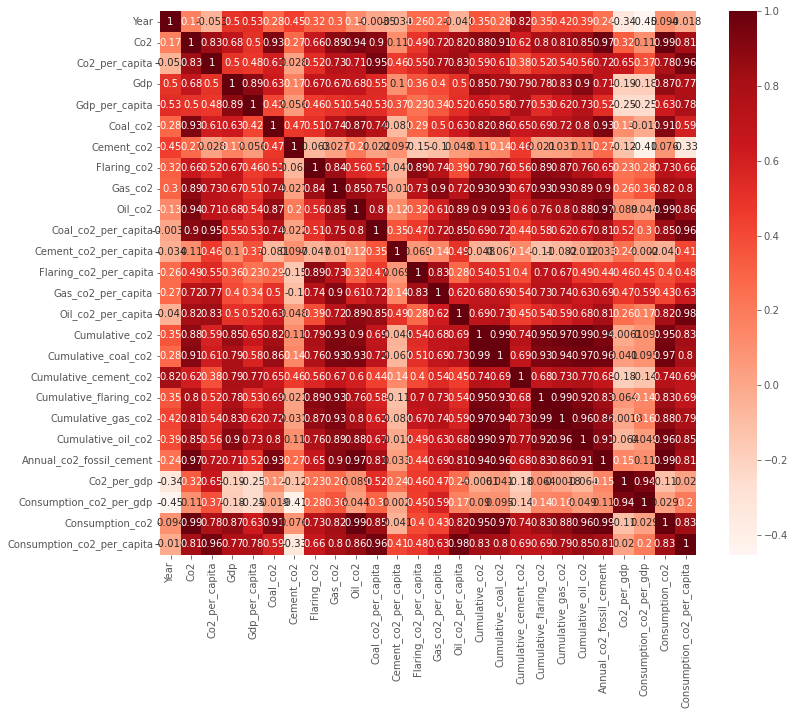

In [18]:
# 1) Filter Method
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df_numeric_only.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [23]:
# Correlation with output variable
cor_target = abs(cor["Co2"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.8]
relevant_features

Co2                           1.000000
Co2_per_capita                0.832502
Coal_co2                      0.928747
Gas_co2                       0.889918
Oil_co2                       0.936984
Coal_co2_per_capita           0.897556
Oil_co2_per_capita            0.821082
Cumulative_co2                0.881167
Cumulative_coal_co2           0.910020
Cumulative_gas_co2            0.810083
Cumulative_oil_co2            0.851780
Annual_co2_fossil_cement      0.971613
Consumption_co2               0.989141
Consumption_co2_per_capita    0.813739
Name: Co2, dtype: float64

In [24]:
relevant_features.shape

(14,)

## Interpretation

Feature Selection (with filtering concept) 

Our dataset's original shape: 244 rows × 27 columns 

OLS algorithm works on numeric and no-missing-value dataset, so firstly, removed columns which have over 50% null values and then removed rows which still have null values. Then, removed "country" column(categorical) as well. 

Then dataset's shape changed to (192, 23). Set the dependent variable as Co2.

Backward Elimination method (used machine learning algorithm, iterative process)
Program feeds the features/columns to OLS ML algorithm and based on its performance, OLS decides to keep or remove the features.

OLS selected *13* columns which have impact to the dependent variable Co2.

['Year', 'Co2_per_capita', 'Gdp', 'Gdp_per_capita', 'Coal_co2', 'Cement_co2', 'Flaring_co2', 'Oil_co2', 'Coal_co2_per_capita', 'Gas_co2_per_capita', 'Oil_co2_per_capita', 'Cumulative_coal_co2', 'Annual_co2_fossil_cement'] 


# References

“Feature Selection Using Wrapper Method - Python Implementation.” Analytics Vidhya, 24 Oct. 2020, https://www.analyticsvidhya.com/blog/2020/10/a-comprehensive-guide-to-feature-selection-using-wrapper-methods-in-python/.